# Python으로 자료의 분포를 묘사하는 방법

복수개의 자료 즉, 자료 집합이 있을 때 자료 값의 분포 특성을 묘사하는 통계적인 방법을 기술 통계(descriptive statistics)라고 한다.

# 단일 자료 집합의 분포를 묘사하는 방법

자료 집합이 하나인 경우에는 보통 다음과 같은 방법으로 분포의 특성을 구하거나 전달할 수 있다.

* 요약 통계
* 히스토그램 (histogram)
* 커널 밀도 (kernel density)

### 요약 통계

요약 통계는 자료 집합에 포함된 값의 최댓값, 최솟값, 평균값, 분산 등을 계산하는 방법을 말한다.

Python에서는 다음과 같은 방법을 사용한다.

* [scipy의 describe 함수](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.describe.html)
* [pandas Series/DataFrame의 describe 메소드](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.describe.html)

In [26]:
np.random.seed(0)
x = np.random.normal(size=100)

In [27]:
sp.stats.describe(x)

DescribeResult(nobs=100, minmax=(-2.5529898158340787, 2.2697546239876076), mean=0.059808015534484997, variance=1.0260874941564961, skewness=0.005171839713550013, kurtosis=-0.3783545566331328)

In [28]:
pd.Series(x).describe()

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
dtype: float64

## 히스토그램

히스토그램은 자료 값이 가질 수 있는 범위를 몇 개의 구간으로 나누고 각 구간에 해당하는 값의 숫자 혹은 상대적 빈도를 계산하는 방법이다.

Python에서 히스토그램을 구하거나 그리기 위해 다음과 같은 방법을 사용한다.

* [matplotlib의 hist 함수](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)
* [seaborn의 distplot 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html)

matplotlib의 hist 함수는 다음과 같은 3개의 값을 반환한다.

* n : 각 구간에 있는 값의 수 혹은 빈도 리스트
* bins : 구간의 경계값 리스트 
* patches : 각 구간을 그리는 matplotlib patch 객체 리스트

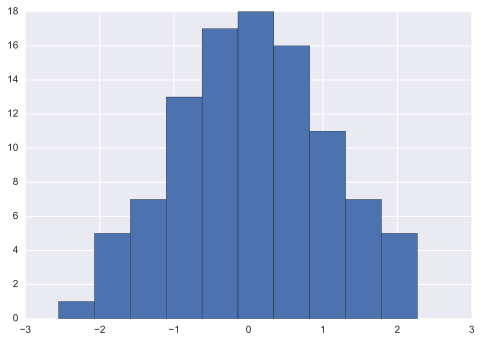

In [29]:
n, bins, patches = plt.hist(x, bins=10)

In [30]:
n

array([  1.,   5.,   7.,  13.,  17.,  18.,  16.,  11.,   7.,   5.])

In [31]:
bins

array([-2.55298982, -2.07071537, -1.58844093, -1.10616648, -0.62389204,
       -0.1416176 ,  0.34065685,  0.82293129,  1.30520574,  1.78748018,
        2.26975462])

In [32]:
patches

<a list of 10 Patch objects>

seaborn의 displot 함수 히스토그램에 대한 axis 객체만을 반환하는 대신 러그(rug), 커널 밀도(kernel density) 등을 표시하거나 특정한 확률 모형으로 fitting하는 추가 기능이 있다.

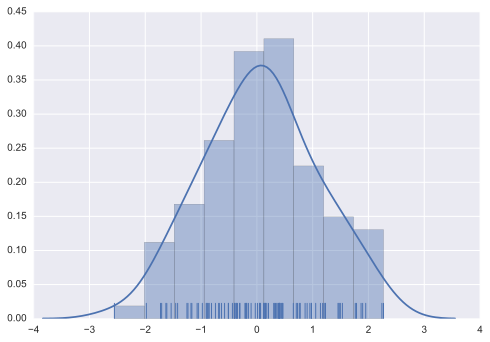

In [33]:
sns.distplot(x, rug=True)

## 커널 밀도

앞의 그림에서 곡선으로 나타난 것이 커널 밀도이다.  커널 밀도는 커널이라고 하는 특정 구간의 분포를 묘사하는 함수의 집합을 사용하여 전체 분포를 묘사하는 방법이다. 커널 밀도를 사용하면 분포의 전체 모양을 파악하기가 더 쉽다.

커널 밀도에 관한 자세한 내용은 scikit-learn 패키지의 사용자 가이드와 예제를 참조하면 된다.

* http://scikit-learn.org/stable/modules/density.html#kernel-density-estimation

## 복수개의 자료 집합의 분포를 묘사하는 경우

자료 집합이 하나가 아니라 두 개 이상이 있는 경우에는 두 자료 집합간의 관계를 알고 싶을 것이다. 

만약 자료 집합의 수가 두 개이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다. 스캐터 플롯을 그리기 위해서는 seaborn 패키지의 joinplot 함수를 사용한다. joinplot 함수는 스캐터 플롯뿐 아니라 각 변수의 히스토그램도 동시에 그린다.

* [seaborn 패키지의 joinplot 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot)



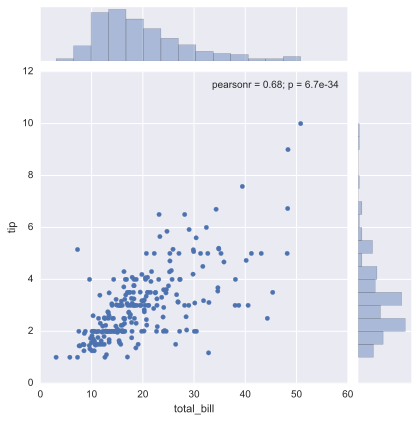

In [34]:
np.random.seed(0)
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips)

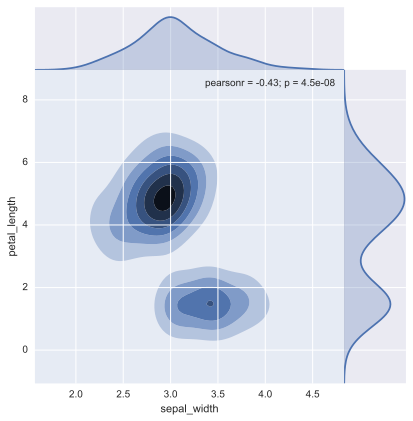

In [38]:
iris = sns.load_dataset("iris")
sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0, zorder=0, n_levels=6)

만약 변수의 집합이 두 개 이상이라면 seaborn 패키지의 pairplot을 사용한다. pairplot은 grid 형태로 각 집합의 조합에 대해 히스토그램과 스캐터 플롯을 그린다.

* [seaborn 패키지의 pairplot 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

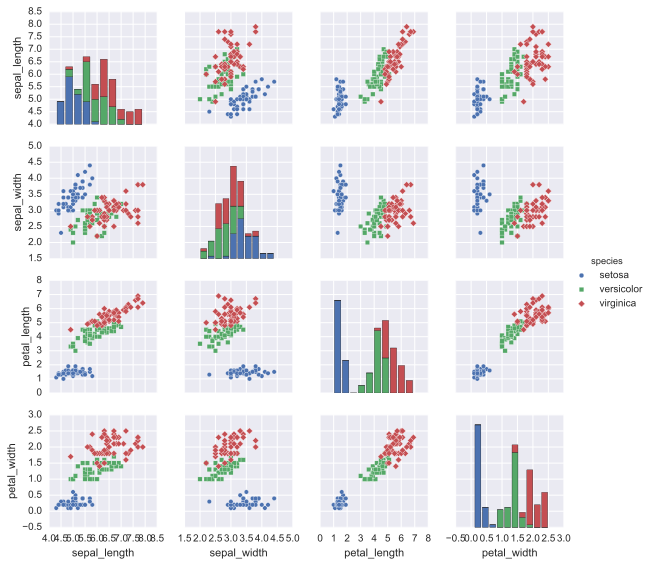

In [46]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"], size=2)

만약 두 자료 집합이 모두 이산적인 값 혹은 카테고리(category) 값을 가진다면  seaborn 패키지의 heatmap을 사용하면 된다.

* [seaborn 패키지의 heatmap 함수](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html)

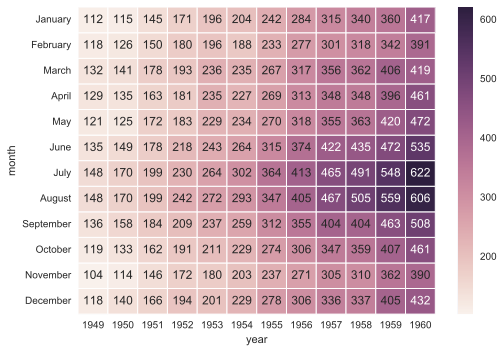

In [5]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights, annot=True, fmt="d", linewidths=1)

두 자료 집합 중 하나는 연속적인 값이고 다른 하나는 이산적인 혹은 카테고리 값인 경우에는 seaborn에서 제공하는 다음과 같은 플롯을 사용할 수 있다.

* [boxplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html)
* [violinplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html)
* [stripplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html)
* [swarmplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.swarmplot.html)
* [pointplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pointplot.html)
* [factorplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)


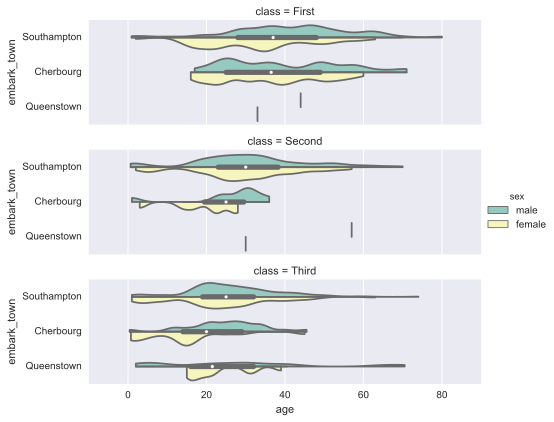

In [7]:
titanic = sns.load_dataset("titanic")
sns.factorplot(x="age", y="embark_town", hue="sex", row="class", data=titanic[titanic.embark_town.notnull()],
               orient="h", size=2, aspect=3.5, palette="Set3", kind="violin", split=True, cut=0, bw=.2)